In [93]:
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection, metrics
from sklearn.metrics import accuracy_score
from keras import regularizers
import numpy as np

In [94]:
BATCH_SIZE = 32
RANDOM_SEED = 42

# Dados

## explorando dados

In [95]:
df_data = pd.read_csv('class_results.csv')

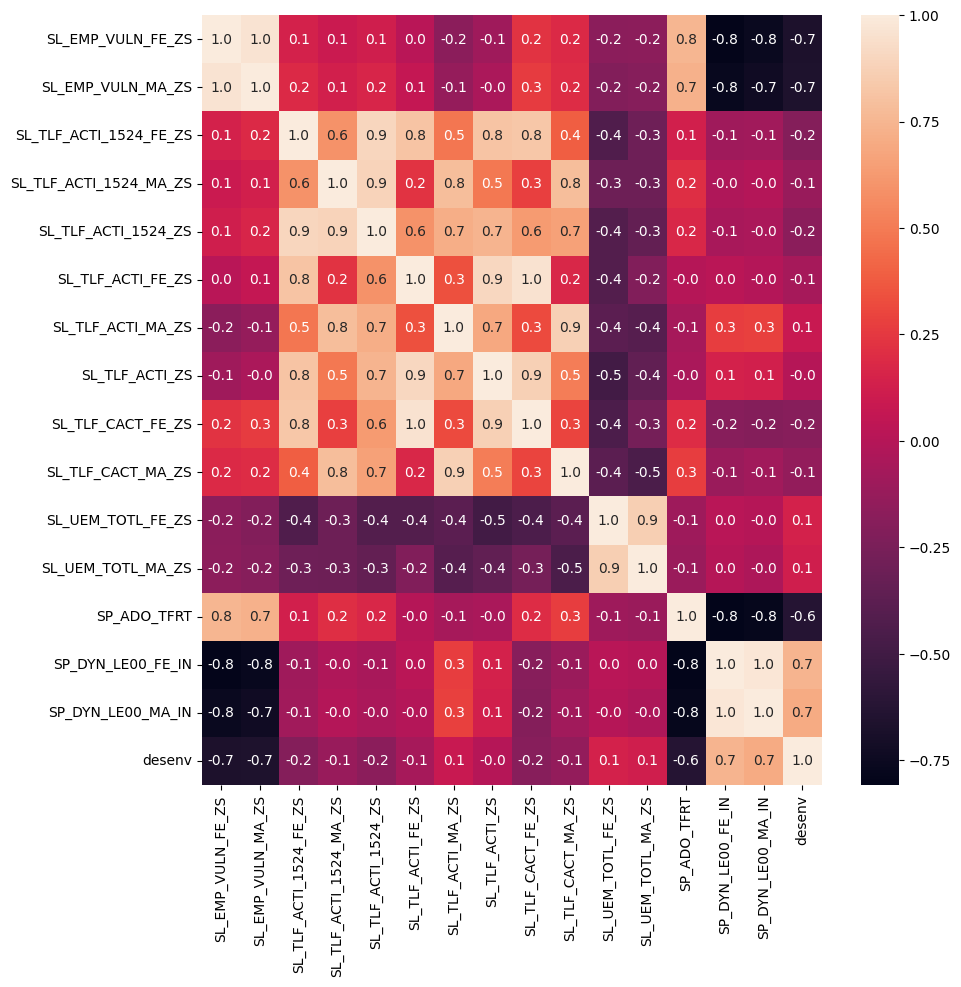

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data.corr(), annot=True, fmt='.1f')
plt.show()

## Divisão dos dados
Adotaremos a regra de ouro 80, 20:
- 80% de dados para treino
- 20% de dados para teste

In [97]:
#ma antes vamos deixar os dados igualmente separados
data_aux = df_data.loc[df_data['desenv'] == 0]
data_aux_2 = df_data[df_data['desenv'] == 1].sample(min(df_data['desenv'].value_counts())) 
df_data = pd.concat([data_aux, data_aux_2])

In [111]:
X_data = np.array(df_data.drop(['desenv'], axis=1))
y_data = np.array(df_data['desenv'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, random_state=RANDOM_SEED, test_size=0.2)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1667, 15) (1667,)
Test:  (417, 15) (417,)


# MODELOS

## Rede neural

## Configurações
### Dimensão VC
No total temos 5007 dados para serem treinados no modelo e a dimensão VC tem a seguinte formula para redes neurais:

$$  n \ge 10 * W $$
> W - peso do modelo

O peso do rede W pode ser representado pela seguinte equação
$$ W = (C+1) * Q_{ce} + (C+1) $$
> C - Numero de colunas no treino  <br>
> Q_ce - Quantide de Camadas Escondidas <br>

Logo, supondo que teremos 1 camada escondida

$$ W =  (15+1) * 1 + (15+1) = 32 $$ 
$$ n \ge 32*10 = 320 $$

320 dados são suficientes para generalizar

### Regra de ouro
Assim, agora precisamos determinar a quantidade de neuronios que serão utilizados nas camadas ocultas. Para isso podemos utilizar o seguinte artificio matematico:

$$ n \le \frac{|DS| - 10}{10(d + n_e)} $$
> DS - Numero de amostras no dataset de treino <br>
> n_e - Numero de camadas escondidas <br>
> d - numero de _features_ <br>

assim,

$$ n \le \frac{4141-10}{10*(15+2)} <=> \frac{4131}{170} \equiv 25 $$

In [100]:
# 1 camada oculta
# 15 valores de entrada
# 22 neuronios na camada oculta

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(25, input_dim=15, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#utilizado a função de ativação tanh para que a saida possa variar entre 0 e 1

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

c:\Users\Xonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 25)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426 (1.66 KB)

 Trainable params: 426 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [101]:

# X_train, X_test, y_train, y_test

model_hdi = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7871 - loss: 0.5618
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9043 - loss: 0.3392
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9121 - loss: 0.2767
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9271 - loss: 0.2528
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9184 - loss: 0.2542
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.2254
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9361 - loss: 0.2420
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9271 - loss: 0.2321
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.2146
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.2368
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.2180
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

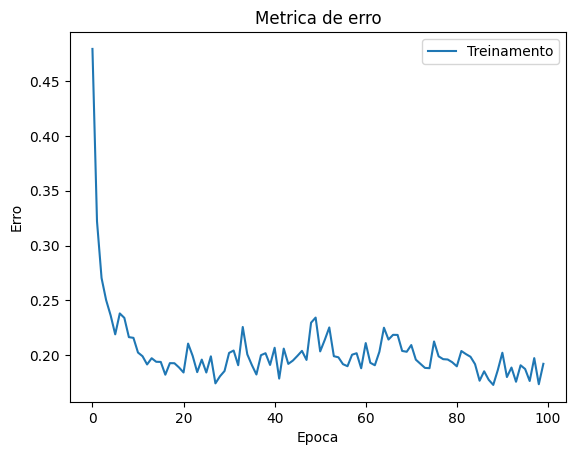

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

--> Acuracia (treino): 0.9448
--> Acuracia (teste): 0.9376
--> E_out - E_in = -0.0052
--> acc_train - acc_test = 0.0072


In [102]:

plt.plot(model_hdi.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

# Obtendo a acuracia usando evaluate()
E_out, acc_test = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - model_hdi.history['loss'][-1]:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

### Validation

c:\Users\Xonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


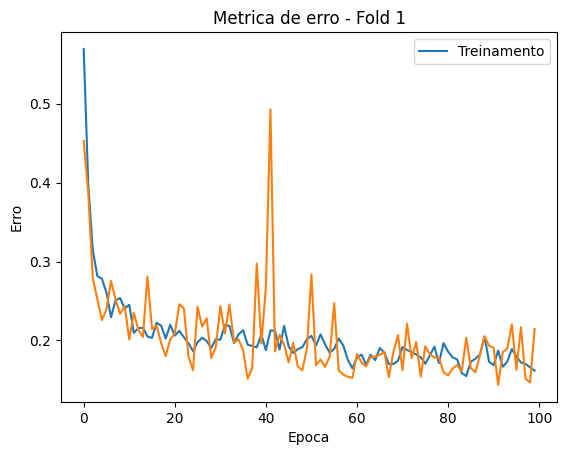

--> Acuracia (treino): 0.8605
--> Acuracia (validacao): 0.8713
--> E_val - E_in = 0.0524
--> acc_in - acc_val = -0.0108



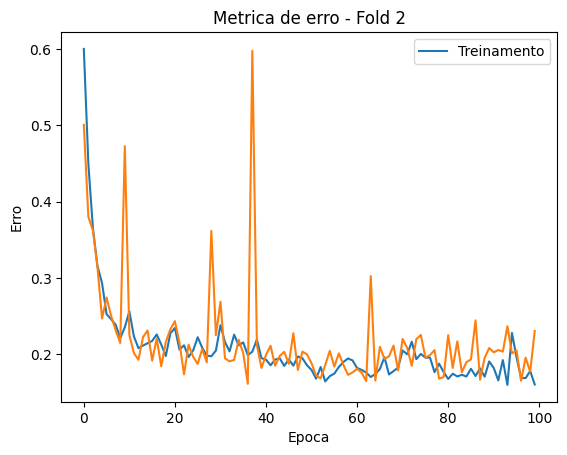

--> Acuracia (treino): 0.9347
--> Acuracia (validacao): 0.9251
--> E_val - E_in = 0.0702
--> acc_in - acc_val = 0.0096



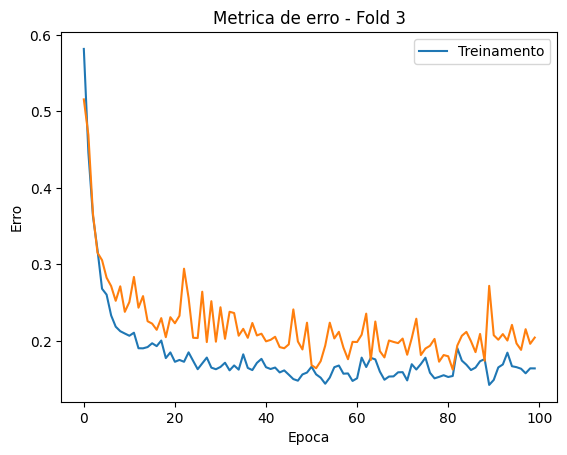

--> Acuracia (treino): 0.9558
--> Acuracia (validacao): 0.9309
--> E_val - E_in = 0.0403
--> acc_in - acc_val = 0.0248



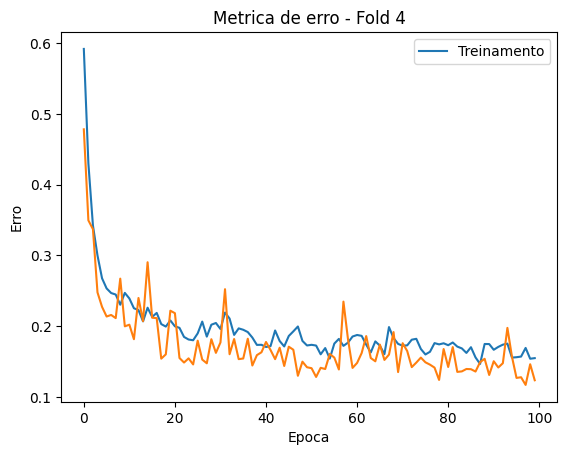

--> Acuracia (treino): 0.9513
--> Acuracia (validacao): 0.9610
--> E_val - E_in = -0.0313
--> acc_in - acc_val = -0.0097



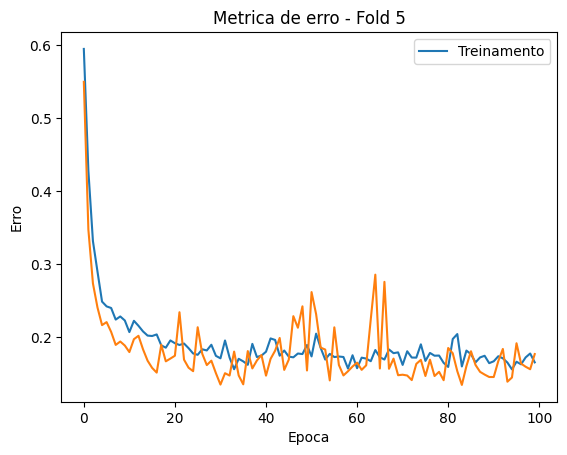

--> Acuracia (treino): 0.9273
--> Acuracia (validacao): 0.9219
--> E_val - E_in = 0.0114
--> acc_in - acc_val = 0.0054



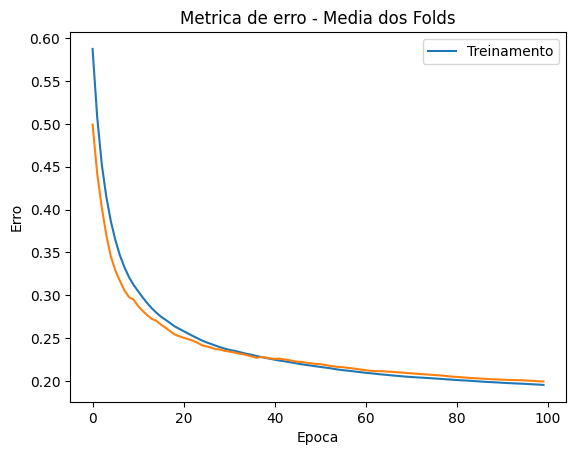

--> Acuracia (treino): 0.9259
--> Acuracia (validacao): 0.9220
--> E_val - E_in = 0.0041
--> acc_in - acc_val = 0.0054



In [103]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, random_state=RANDOM_SEED, test_size=0.2)

# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True)

accuracies_train = []
accuracies_val = []
history_list = []

# Realiza o k-fold cross validation
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    i = i + 1
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    # Rede configurada a partir de informações da dimensão VC e da regra de ouro
    model.add(Dense(22, input_dim=15, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Instanciação e configuração de otimizadores
    sgd = optimizers.SGD(learning_rate=0.01)

    # Compila o modelo
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=100, batch_size=BATCH_SIZE, verbose=0)
    history_list.append(history) 
    
    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    
    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")    

# Calcula a acuracia media
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))                            
                   
plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_val - E_in = {(history_val_loss_avg[-1] - history_loss_avg[-1]):.4f}")
print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")    


In [104]:
X_test

array([[ 12.65753598,  15.69851786,  38.745     , ...,   8.233     ,
         78.8       ,  71.4       ],
       [ 84.24161969,  73.33043506,  25.636     , ...,  95.218     ,
         59.251     ,  57.165     ],
       [ 39.18650619,  32.18110307,  23.181     , ...,  49.156     ,
         73.997     ,  70.244     ],
       ...,
       [ 72.94767717,  45.99163081,  50.881     , ..., 115.988     ,
         55.924     ,  53.009     ],
       [ 97.80674405,  88.35634963,  49.653     , ..., 147.542     ,
         47.113     ,  44.509     ],
       [ 83.93550356,  58.04623444,  61.631     , ...,  81.005     ,
         63.272     ,  59.907     ]])

In [105]:
y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [106]:

y_pred_test

[1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [107]:
# MATRIZ DE CONFUSAO
y_pred_test = model.predict(X_test)
y_pred_test = [round(y[0]) for y in y_pred_test]
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_test).flatten()

acc = (tn+tp)/(tn+fp+tp+fp)
precis = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1_score = 2 *(precis*recall)/(precis+recall)
print('================= MATRIZ DE CONFUSAO =======================')
print('REDE NEURAL')
print(f'           Negativo | Positivo              ')
print(f'Negativo   {tn}     |   {fp}                ')
print(f'Positivo   {fn}     |   {tp}                ')
print(f'===========================================================')
print(f'Acuracia = {acc}')
print(f'Precisao = {precis}')
print(f'Recall = {(tp)/(tp+fn)}')
print(f'f1-Score =  {f1_score}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
================= MATRIZ DE CONFUSAO =======================
REDE NEURAL
           Negativo | Positivo              
Negativo   198     |   24                
Positivo   16     |   179                
Acuracia = 0.8870588235294118
Precisao = 0.8817733990147784
Recall = 0.9179487179487179
f1-Score =  0.8994974874371859


## Arvore de Decisão

In [113]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, random_state=RANDOM_SEED, test_size=0.2)

print("Numero de amostras: " + str(len(X_data)))
print("dimensão das amostras: " + str(len(X_data[0])))

Numero de amostras: 2084
dimensão das amostras: 15


Ein: 0.0000
Eout: 0.0288
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       222
           1       0.97      0.97      0.97       195

    accuracy                           0.97       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417



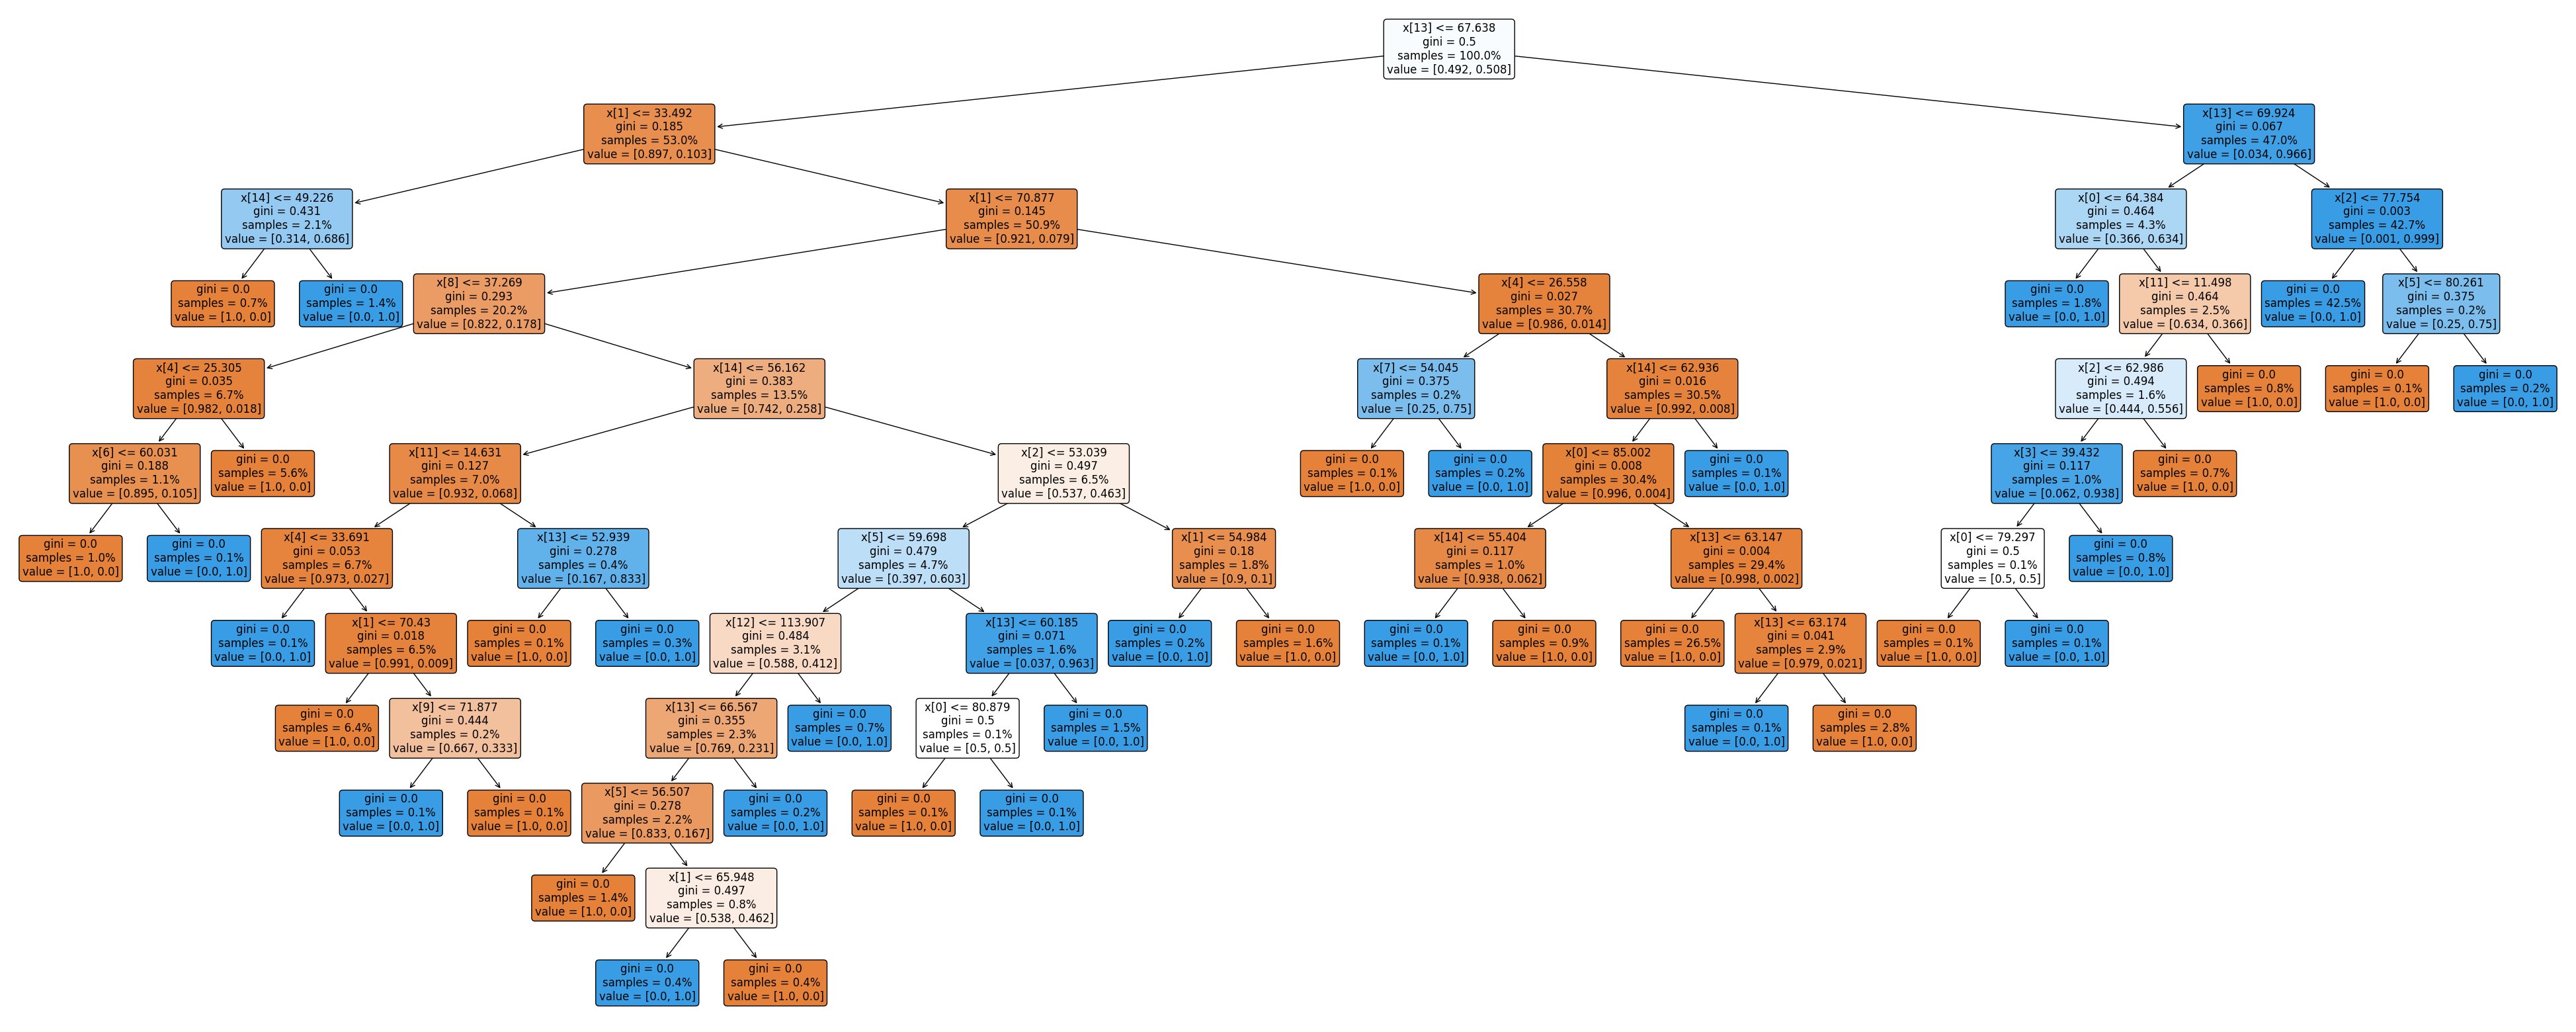

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=12, 
    rounded = True)
plt.show()